In [22]:
import csv
from itertools import islice
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

In [47]:

import folium
from folium.plugins import HeatMap
import webbrowser
from pyecharts.charts import Line
from pyecharts import options as opts


ModuleNotFoundError: No module named 'pyecharts'

In [41]:
# import modules

csv_data_file = 'new_data_cleaned.csv'

# read csv dataset
with open(csv_data_file) as csvfile:
    csv_reader = csv.reader(csvfile)
    lats_longs = []
    for row in islice(csv_reader, 1, None):
        line = []
        line.append(row[9]) # Lat
        line.append(row[10]) # Long
        lats_longs.append(line)

# folium
map_obj = folium.Map(location = [38, -119], zoom_start = 6) # open at CA
HeatMap(lats_longs,radius = 10).add_to(map_obj)

'''
# save to html
if __name__ == '__main__':
    file_path = r"new_heatmap_ca.html"
    map_obj.save(file_path)  # save as html file
    webbrowser.open(file_path)  # open with default browser
'''

map_obj

In [44]:

count_csv = 'station_count.csv'
all_data = []

with open(count_csv) as csvfile:
    csv_reader = csv.reader(csvfile)
    for row in csv_reader:
        all_data.append(row)

x_data = all_data[0]

(
    Line()
    .add_xaxis(xaxis_data=x_data)
    .add_yaxis(
        series_name="Num of charging outlets",
        #stack="总量",
        y_axis=all_data[1],
        label_opts=opts.LabelOpts(is_show=True),
    )
    .add_yaxis(
        series_name="Num of stations",
        y_axis=all_data[2],
        label_opts=opts.LabelOpts(is_show=True),
    )
    .add_yaxis(
        series_name="Num of Level 1 charger",
        y_axis=all_data[3],
        label_opts=opts.LabelOpts(is_show=True),
    )
    .add_yaxis(
        series_name="Num of Level 2 charger",
        y_axis=all_data[4],
        label_opts=opts.LabelOpts(is_show=True),
    )
    .add_yaxis(
        series_name="Num of DC charger",
        y_axis=all_data[5],
        label_opts=opts.LabelOpts(is_show=True),
    )
    .set_global_opts(
        title_opts=opts.TitleOpts(title="", pos_top='5%'),
        tooltip_opts=opts.TooltipOpts(trigger="axis"),
        yaxis_opts=opts.AxisOpts(
            type_="value",
            axistick_opts=opts.AxisTickOpts(is_show=True),
            splitline_opts=opts.SplitLineOpts(is_show=True),
        ),
        xaxis_opts=opts.AxisOpts(type_="category", boundary_gap=False),
    )
    .render("count_with_time.html")
)

NameError: name 'Line' is not defined

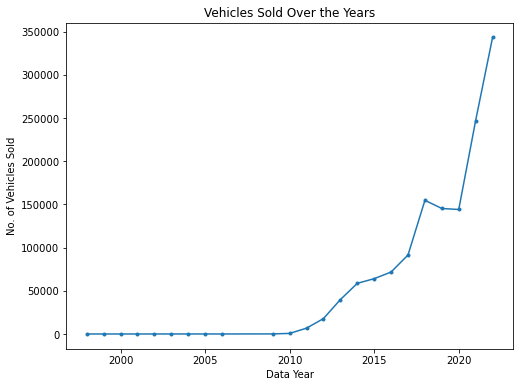

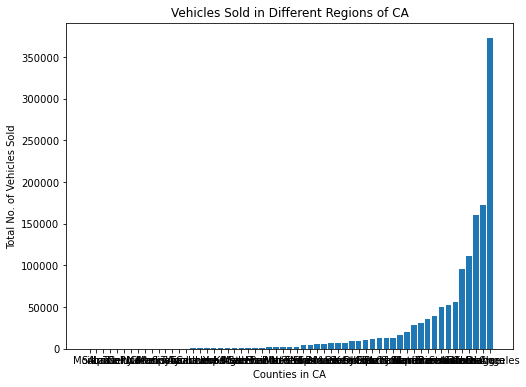

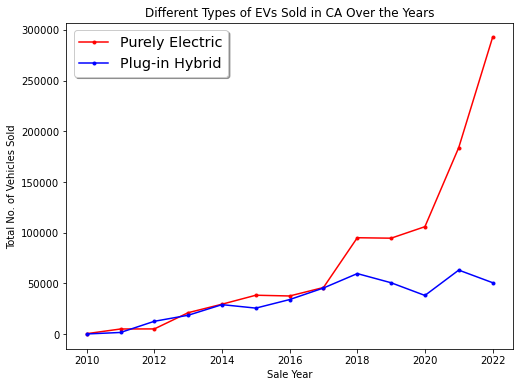

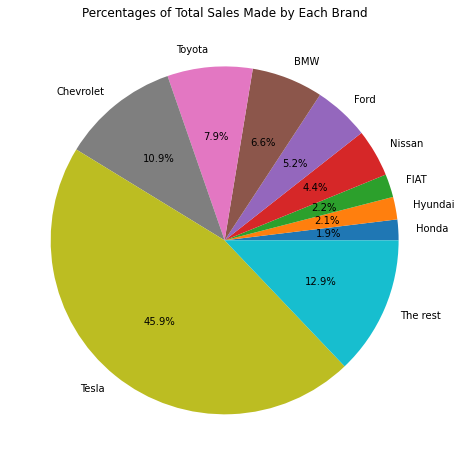

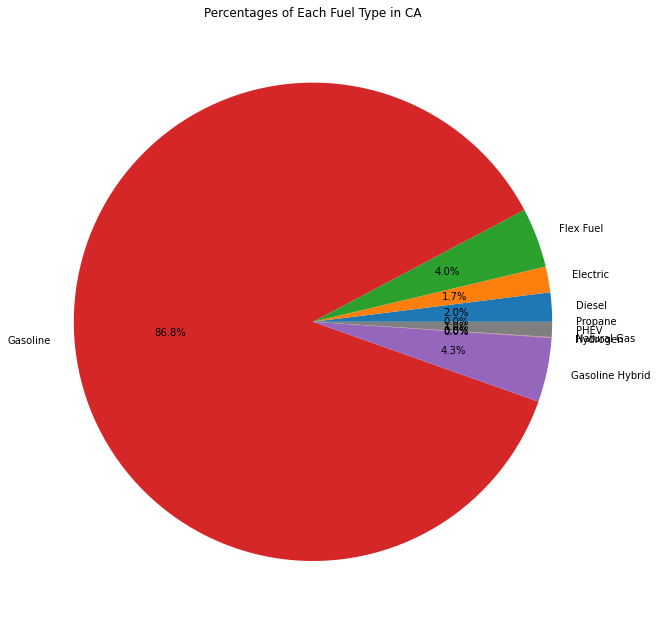

In [26]:
dfs = pd.read_excel(r'New_ZEV_Sales_Last_updated_01-18-2023.xlsx', 'County')
dfs= dfs[~(dfs['FUEL_TYPE'] =='Hydrogen')]
dfs_newsale_amount_over_time = dfs.groupby('Data Year').sum()
# print(dfs_newsale_amount_over_time)
plt.figure(figsize=(8, 6))
plt.plot(dfs_newsale_amount_over_time.index, dfs_newsale_amount_over_time["Number of Vehicles"], marker = '.')
plt.xlabel('Data Year')
plt.ylabel('No. of Vehicles Sold')
plt.title('Vehicles Sold Over the Years')
plt.show()
dfs_amount_over_places = dfs.groupby(by = 'County')['Number of Vehicles'].sum()
dfs_amount_over_places = dfs_amount_over_places.sort_values()
#print(dfs_amount_over_places)
plt.figure(figsize=(8, 6))
plt.bar(dfs_amount_over_places.index, dfs_amount_over_places)
plt.xlabel('Counties in CA')
plt.ylabel('Total No. of Vehicles Sold')
plt.title('Vehicles Sold in Different Regions of CA')
plt.show()
dfs_recent = dfs[dfs['Data Year'] > 2009]
dfs_recent_group = dfs_recent.groupby('FUEL_TYPE')
dfs_recent_sum = {}
for kind in ['Electric', 'PHEV']:
    dfs_recent_sum[kind] = dfs_recent_group.get_group(kind).groupby(by="Data Year")["Number of Vehicles"].sum()
#print(dfs_recent_sum['PHEV'])
plt.figure(figsize=(8, 6))
plt.plot(dfs_recent_sum['Electric'].index, dfs_recent_sum['Electric'], 'r-', dfs_recent_sum['Electric'].index, dfs_recent_sum['PHEV'], 'b-', marker = '.')
plt.xlabel('Sale Year')
plt.ylabel('Total No. of Vehicles Sold')
plt.title('Different Types of EVs Sold in CA Over the Years')
plt.legend(loc='upper left', shadow=True, fontsize='x-large', labels = ['Purely Electric', "Plug-in Hybrid"])
plt.show()
dfs_recent_brand = dfs_recent.groupby(by = 'MAKE')['Number of Vehicles'].sum()
dfs_recent_brand = dfs_recent_brand.sort_values()
#print(dfs_recent_brand)
dfs_recent_brand['The rest'] = 0
#print(dfs_recent_brand)
dfs_recent_brand_mono = dfs_recent_brand
for brand in ['Audi', 'BMW', 'Bentley', 'Cadillac', 'Chevrolet', 'Chrysler', 'FIAT', 'Ferrari', 'Fisker', 'Ford', 'GMC', 'Genesis', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Karma', 'Kia', 'Land Rover', 'Lexus', 'Lincoln', 'Lucid', 'MINI', 'Mazda', 'McLaren', 'Mercedes-Benz', 'Mitsubishi', 'Nissan', 'Polestar', 'Porsche', 'Rivian', 'Scion', 'Smart', 'Subaru', 'Tesla', 'Toyota', 'Toyota/Subaru', 'Volkswagen', 'Volvo']:
    if dfs_recent_brand_mono[brand] < dfs_recent_brand_mono['Honda']:
        dfs_recent_brand_mono['The rest'] += dfs_recent_brand_mono[brand]
        del dfs_recent_brand_mono[brand]
#print(dfs_recent_brand_mono)
#print(dfs_recent_brand_mono.keys())
plt.figure(figsize=(10, 8))
plt.pie(dfs_recent_brand_mono, labels = dfs_recent_brand_mono.keys(), autopct='%1.1f%%')
plt.title('Percentages of Total Sales Made by Each Brand')
plt.show() 
dfp = pd.read_excel(r'Vehicle_Population_Last_updated_04-29-2022.xlsx', 'County')
dfp_most_recent = dfp.groupby(by = 'Data Year')
dfp_most_recent.groups.keys()
dfp_2021 = dfp_most_recent.get_group(2021)
#print(dfp_2021)
dfp_cur_ft = dfp_2021.groupby(by = 'Fuel Type')['Number of Vehicles'].sum()
#print(dfp_cur_ft)
plt.figure(figsize=(11, 11))
plt.pie(dfp_cur_ft, labels = dfp_cur_ft.keys(), autopct='%1.1f%%')
plt.title('Percentages of Each Fuel Type in CA')
plt.show() 

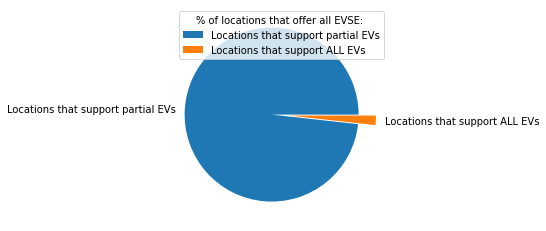

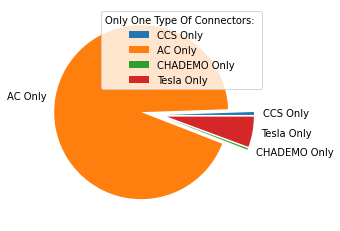

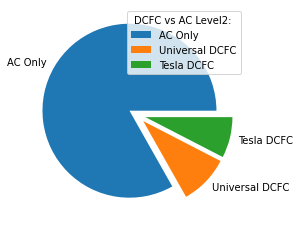

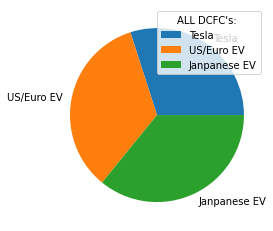

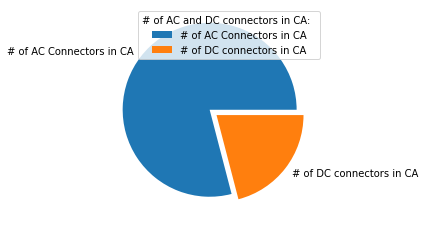

In [17]:

want_to_opne = 'data_cleaned.csv'
want_to_out = 'Ev_Charger_type.csv'
type_file = 'Ev_Charger_type.csv'

with open(want_to_opne) as WTO:
    file_read = csv.reader(WTO)

    all_data = []
    for row in file_read:
        #print(row[12])
        all_data.append(row)
        #print(len(all_data))
        
        '''
        types = []
        n = str(row[12])
        
        types.append(n)
        #types = tuple(types)
        
        for i in types:
            i_types = tuple(i)
        #print(i_types)
        count = 0
        for i in i_types:
            if i == 'B':
                count = count+1
        location = np.where(count == 1)

        check = np.array(location)
        
        #print(check)
        

        #print(test[0])
        '''
  

        
with open(want_to_out, 'w', newline='') as outfile:
    writer = csv.writer(outfile)
    writer.writerow(['Charger_Connector_Type'])
    for i in range(len(all_data)):
    
        try_writing = [all_data[i][12]]
        writer.writerow(try_writing)

with open(type_file) as connectors:
    file_read = csv.reader(connectors)
    Con_types = []
    for row in file_read:
        #print(row[12])
        Con_types.append(row)
     
        
    ''' 
    a = 0
    b = a+1
    c = np.array([])
    for i in range(len(Con_types)):
        
        
        while b<= i:
            stack_a = np.array([Con_types[a][0]])
            stack_b = np.array([Con_types[b][0]])
            c = np.hstack([stack_a,stack_b])
            
            b = b+1
            a = a+1
        print(c)
            
     '''  
        
   
        
    
    #print ((Con_types[2][0]))

    
    
    

    count_J1772 = 0 
    count_CHADEMO = 0
    count_ccs = 0 
    count_ALL_DC = 0
    count_CHADEMO_J1772_J1772COMBOl = 0
    count_CHADEMO_J1772 = 0
    count_J1772_J1772COMBO = 0
    count_Tesla = 0 
    count_Tesla_J1772 = 0
      
    Total_CCS = 1292
    Total_CHADEMO = 1356
    Total_J1772 = 14220
    Total_connectors = len(Con_types)
    Total_Tesla = 1132
    Total_NEMA = 48
    Total_AC = Total_NEMA+Total_J1772
    Total_DC = Total_Tesla+Total_CHADEMO+Total_CCS
    
    for i in range(len(Con_types)) :
        if Con_types[i][0] == 'J1772':
            count_J1772 = count_J1772+1
    t = '# of locations that have only J1772 Level 2 Connectors: '
    t = t.title()
    #print(t,count_J1772)
                   
    for i in range(len(Con_types)) :
        if Con_types[i][0] == 'CHADEMO':
            count_CHADEMO = count_CHADEMO+1
    tt = '# of locations that have only CHADEMO Connectors: '
    tt = tt.title()
    #print(tt,count_CHADEMO)
       
    for i in range(len(Con_types)) :
        if Con_types[i][0] == 'J1772COMBO':
            count_ccs = count_ccs+1  
    ttt = '# of locations that have only CCS Connectors: '
    ttt = ttt.title()
    #print(ttt,count_ccs)
    
    for i in range(len(Con_types)):
        if Con_types[i][0] == 'CHADEMO J1772COMBO':
            
            count_ALL_DC += 1
    text = '# of locations that both (CHADEMO CCS) DC Fast Connectors: '
    text = text.title()
    #print(text, count_ALL_DC)

    for i in range(len(Con_types)):
        if Con_types[i][0] == 'CHADEMO J1772 J1772COMBO':
            
            count_CHADEMO_J1772_J1772COMBOl += 1
    text = '# of locations that have all connector types (CHADEMO CCS and J1772): '
    text = text.title()
    #print(text, count_CHADEMO_J1772_J1772COMBOl)
    
    for i in range(len(Con_types)):
        if Con_types[i][0] == 'CHADEMO J1772':
            count_CHADEMO_J1772 += 1
        elif Con_types[i][0] == 'J1772 CHADEMO':
            count_CHADEMO_J1772 += 1
    text = '# of locations that support DC CHADEMO, AC J1772 connectors: '
    text = text.title()
    #print(text, count_CHADEMO_J1772)
    
    for i in range(len(Con_types)):
        if Con_types[i][0] == 'J1772 J1772COMBO':
            count_J1772_J1772COMBO += 1
        elif Con_types[i][0] == 'J1772 J1772COMBO':
            count_J1772_J1772COMBO += 1
            
            
    text = '# of locations that support DC CCS J1772COMBO, AC J1772 connectors: '
    text = text.title()
    #print(text, count_J1772_J1772COMBO)

    
    for i in range(len(Con_types)) :
        if Con_types[i][0] == 'TESLA':
            count_Tesla = count_Tesla+1
    t = '# of locations that have only Tesla Connectors: '
    t = t.title()
    #print(t,count_Tesla)
    

    for i in range(len(Con_types)) :
        if Con_types[i][0] == 'J1772 TESLA':
            count_Tesla_J1772 = count_Tesla_J1772+1
    t = '# of locations that have  Tesla DCFC and J1772 AC connectors: '
    t = t.title()
    #print(t,count_Tesla_J1772)
    


    
    All_Types = ('count_J1772', 'count_CHADEMO', 'count_ccs' ,'count_ALL_DC' ,
             'count_CHADEMO_J1772_J1772COMBOl' ,'count_CHADEMO_J177',
             'count_Tesla','count_Tesla_J1772')
    All_Numbers = (count_J1772, count_CHADEMO, count_ccs ,count_ALL_DC,
             count_CHADEMO_J1772_J1772COMBOl, count_CHADEMO_J1772,
             count_Tesla,count_Tesla_J1772)
    
    All_zip = zip(All_Types,All_Numbers)
    Types_dict = dict(tuple(All_zip))
    
    Total_connectors = len(Con_types)
    not_all = Total_connectors - count_CHADEMO_J1772_J1772COMBOl
    
    
    y = np.array([not_all, count_CHADEMO_J1772_J1772COMBOl])
    mylabels = [ 'Locations that support partial EVs', 'Locations that support ALL EVs']
    myexplode = [0.1, 0.1]
    
    plt.pie(y, labels = mylabels, explode = myexplode,)
    plt.legend(title = "% of locations that offer all EVSE: ")
    plt.show() 
    
    
    
    
    y = np.array([count_ccs,count_J1772,count_CHADEMO, count_Tesla])
    mylabels = [ 'CCS Only', 'AC Only','CHADEMO Only', 'Tesla Only']
    myexplode = [0.1, 0.2, 0.1,0.1]
    
    plt.pie(y, labels = mylabels, explode = myexplode,)
    plt.legend(title = "Only One Type Of Connectors: ")
    plt.show() 
    
    
    
    
    Exists_Universal_DC = count_CHADEMO + count_ccs +count_ALL_DC+ count_CHADEMO_J1772_J1772COMBOl
    Exists_Tesla_DC = count_Tesla+count_Tesla_J1772
    y = np.array([ count_J1772,Exists_Universal_DC,Exists_Tesla_DC])
    mylabels = [ 'AC Only','Universal DCFC',  'Tesla DCFC']
    myexplode = [0.1, 0.1, 0.1]
    
    plt.pie(y, labels = mylabels, explode = myexplode,)
    plt.legend(title = "DCFC vs AC Level2: ")
    plt.show() 
    


    
    y = np.array([ Total_Tesla,Total_CCS, Total_CHADEMO])
    mylabels = [ 'Tesla','US/Euro EV','Janpanese EV']
    myexplode = [0, 0, 0]
    
    plt.pie(y, labels = mylabels, explode = myexplode,)
    plt.legend(title = "ALL DCFC's: ")
    plt.show() 
    

    
    
    y = np.array([ Total_AC, Total_DC])
    mylabels = [ '# of AC Connectors in CA', '# of DC connectors in CA']
    myexplode = [0.1, 0]
    
    plt.pie(y, labels = mylabels, explode = myexplode,)
    plt.legend(title = "# of AC and DC connectors in CA:  ")
    plt.show() 
    